Dataset Overview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

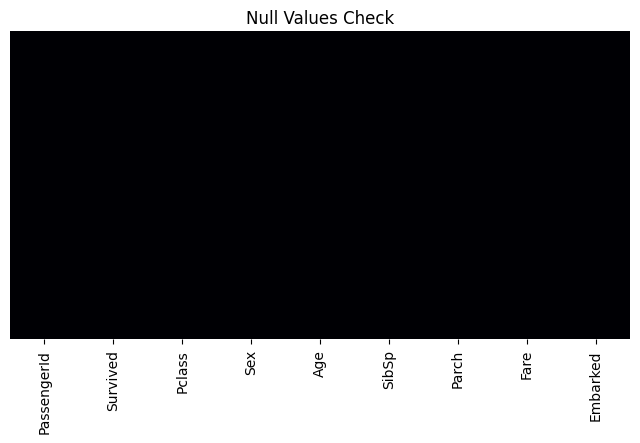

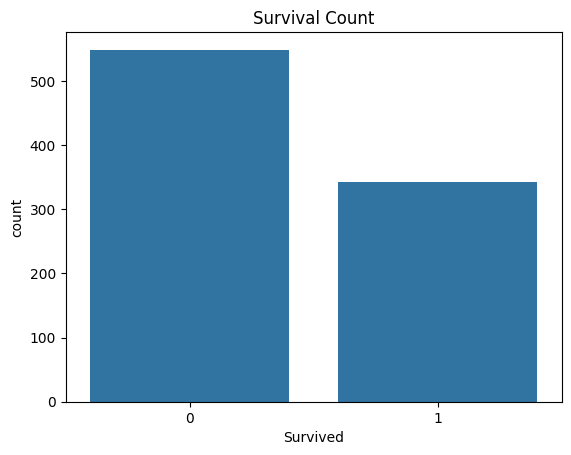

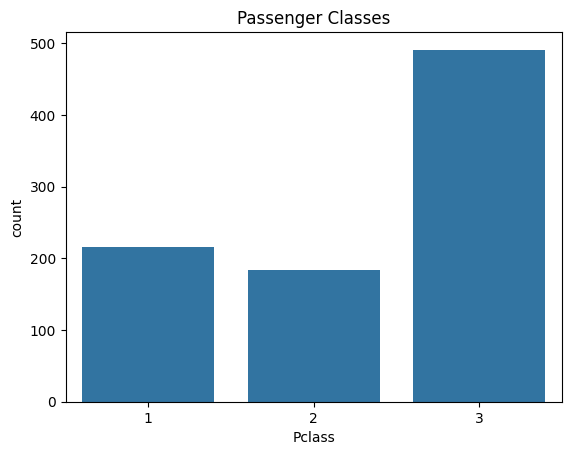

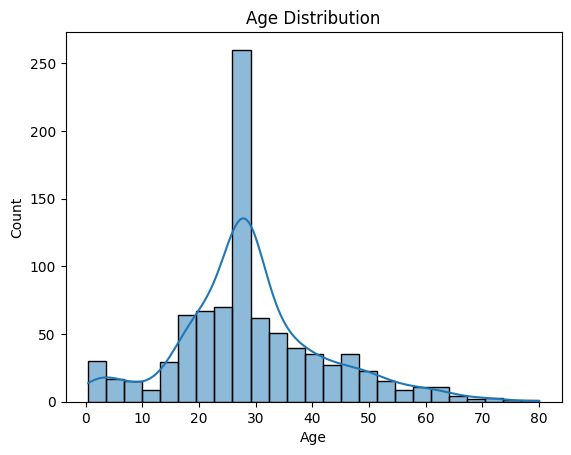

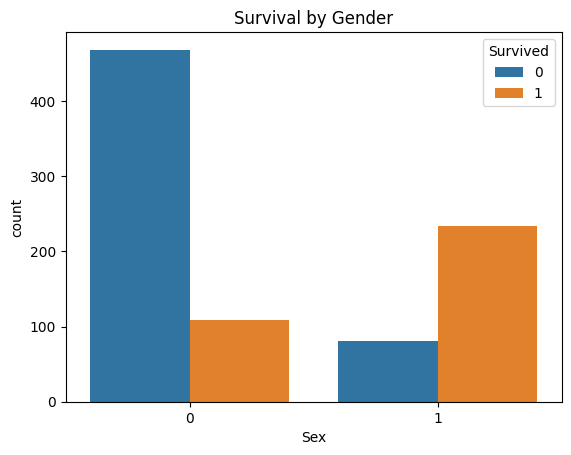

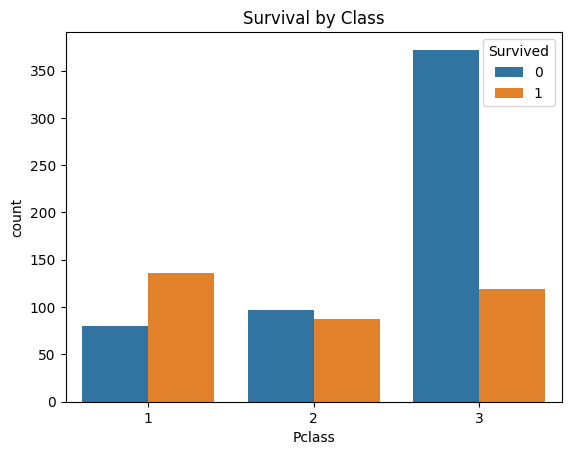

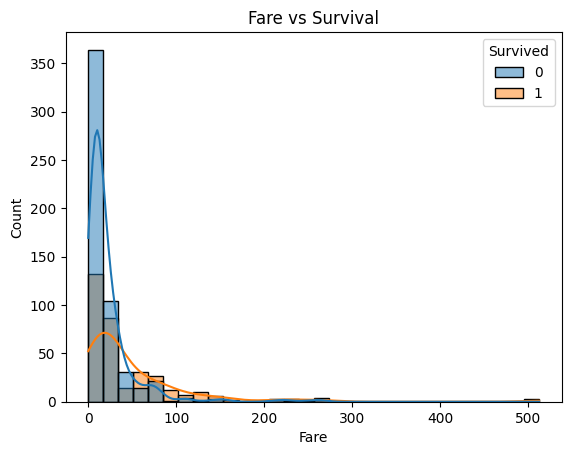

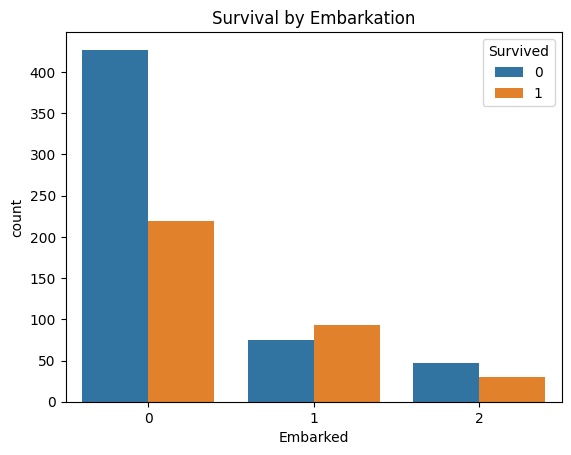

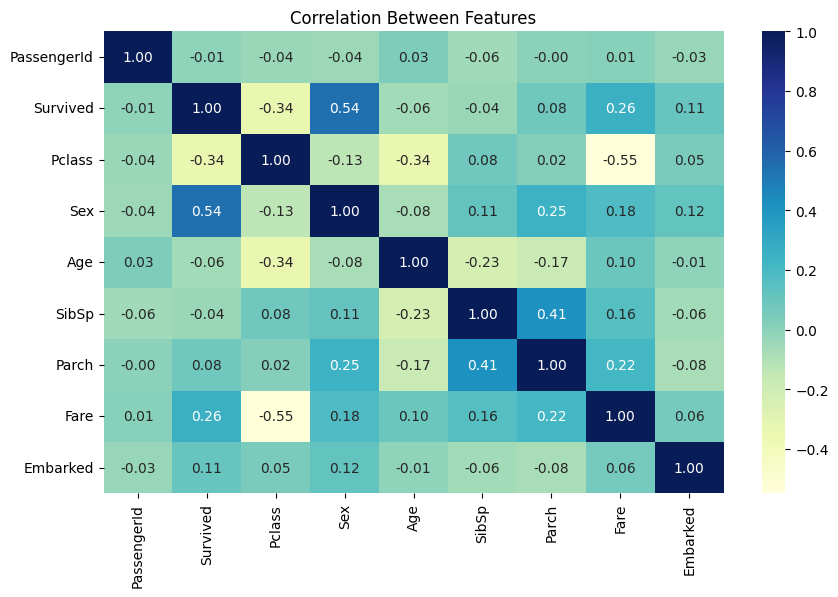

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Titanic dataset
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Step 3: Initial Exploration
print("Dataset Overview:")
print(titanic.head())
print("\nData Types and Nulls:")
print(titanic.info())
print("\nDescriptive Statistics:")
print(titanic.describe())

# Step 4: Data Cleaning
# Remove less useful columns
titanic.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

# Handle missing values
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Step 5: Encode Categorical Data
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Step 6: Visualize missing values (just to confirm)
plt.figure(figsize=(8, 4))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.title("Null Values Check")
plt.show()

# Step 7: Univariate Analysis
sns.countplot(x='Survived', data=titanic)
plt.title("Survival Count")
plt.show()

sns.countplot(x='Pclass', data=titanic)
plt.title("Passenger Classes")
plt.show()

sns.histplot(titanic['Age'], bins=25, kde=True)
plt.title("Age Distribution")
plt.show()

# Step 8: Bivariate Analysis
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title("Survival by Gender")
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title("Survival by Class")
plt.show()

sns.histplot(data=titanic, x='Fare', hue='Survived', kde=True, bins=30)
plt.title("Fare vs Survival")
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title("Survival by Embarkation")
plt.show()

# Step 9: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Between Features")
plt.show()
